In [1]:
import os
import scanpy as sc
from scipy import sparse
import numpy as np
import pandas as pd
import scipy.io as sio 

In [2]:
%%time
counts = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE72056/counts.csv', index_col=0, header=0).T
obs = pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE72056/obs.csv',index_col=0, header=0)

CPU times: total: 9.78 s
Wall time: 9.81 s


In [3]:
adata = sc.AnnData(X=counts, obs=obs)

C:\Users\23247\AppData\Local\Temp\ipykernel_9688\1923552843.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=counts, obs=obs)
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [4]:
cell_type_mapping = {  
    0: 'Malignant',  
    1: 'T',  
    2: 'B',  
    3: 'Macro',  
    4: 'Endo',  
    5: 'CAF',  
    6: 'NK'  
}  

In [5]:
adata.obs['cell_type'] = adata.obs['cell_type'].map(cell_type_mapping)

In [6]:
adata.obs.cell_type.value_counts()

T            2068
Malignant    1758
B             515
Macro         126
Endo           65
CAF            61
NK             52
Name: cell_type, dtype: int64

In [7]:
adata.X = sparse.csr_matrix(adata.X)

In [8]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [9]:
adata = adata[adata.obs.total_counts < 75000, :]

In [10]:
adata

View of AnnData object with n_obs × n_vars = 4645 × 23686
    obs: 'tumor', 'malignant', 'cell_type', 'n_genes_by_counts', 'total_counts'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\PyTorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
D:\Anaconda3\envs\PyTorch\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [12]:
adata

AnnData object with n_obs × n_vars = 4645 × 22289
    obs: 'tumor', 'malignant', 'cell_type', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

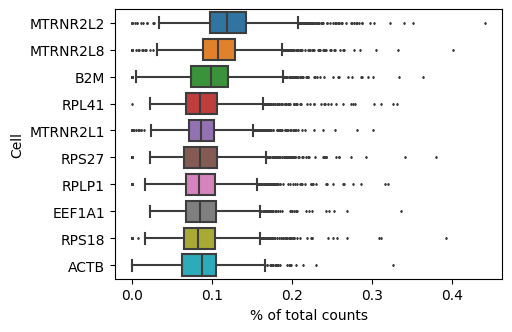

In [13]:
sc.pl.highest_expr_genes(adata, n_top=10, )

In [14]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [15]:
adata.obs

,tumor,malignant,cell_type,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt
Cell,,,,,,,,
Cy72_CD45_H02_S758_comb,72,1,B,3365,7143.362305,3365,0.0,0.0
CY58_1_CD45_B02_S974_comb,58,1,T,3637,8915.833008,3637,0.0,0.0
Cy71_CD45_D08_S524_comb,71,2,Malignant,4660,12578.256836,4660,0.0,0.0
Cy81_FNA_CD45_B01_S301_comb,81,2,Malignant,6387,16763.656250,6387,0.0,0.0
Cy80_II_CD45_B07_S883_comb,80,2,Malignant,5913,16326.734375,5913,0.0,0.0
...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,75,1,T,5385,11474.258789,5385,0.0,0.0
CY75_1_CD45_CD8_1__S65_comb,75,1,T,4769,10071.713867,4769,0.0,0.0
CY75_1_CD45_CD8_1__S93_comb,75,1,T,4727,10088.591797,4727,0.0,0.0


In [16]:
adata.obs['label']=adata.obs['cell_type']

In [17]:
adata.obs

,tumor,malignant,cell_type,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,label
Cell,,,,,,,,,
Cy72_CD45_H02_S758_comb,72,1,B,3365,7143.362305,3365,0.0,0.0,B
CY58_1_CD45_B02_S974_comb,58,1,T,3637,8915.833008,3637,0.0,0.0,T
Cy71_CD45_D08_S524_comb,71,2,Malignant,4660,12578.256836,4660,0.0,0.0,Malignant
Cy81_FNA_CD45_B01_S301_comb,81,2,Malignant,6387,16763.656250,6387,0.0,0.0,Malignant
Cy80_II_CD45_B07_S883_comb,80,2,Malignant,5913,16326.734375,5913,0.0,0.0,Malignant
...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_7__S223_comb,75,1,T,5385,11474.258789,5385,0.0,0.0,T
CY75_1_CD45_CD8_1__S65_comb,75,1,T,4769,10071.713867,4769,0.0,0.0,T
CY75_1_CD45_CD8_1__S93_comb,75,1,T,4727,10088.591797,4727,0.0,0.0,T


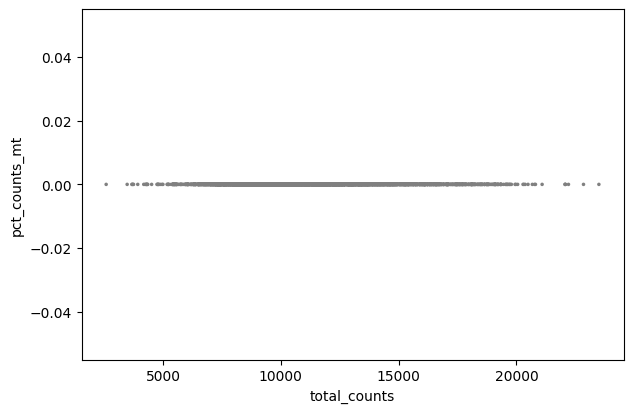

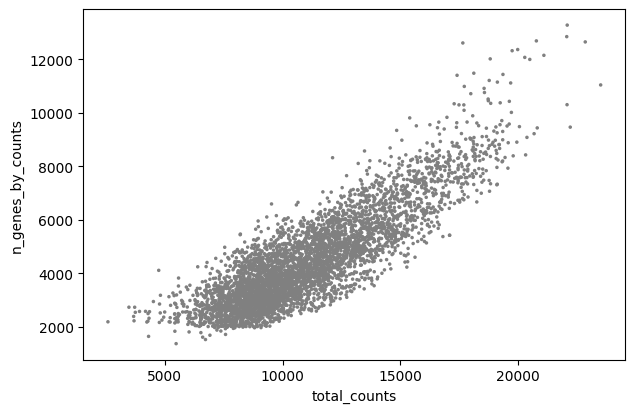

In [18]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [19]:
adata.raw = adata

In [20]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Tirosh/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Tirosh/processed')

adata.write('D:/MyData/scEDGE_Generation/data/Tirosh/processed/Tirosh.h5ad')

In [21]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var 

In [22]:
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/Tirosh/processed/tirosh_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/Tirosh/processed/tirosh_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Tirosh/processed/tirosh_expression_matrix.mtx', expression_matrix)

## Top2000

In [23]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

D:\Anaconda3\envs\PyTorch\lib\site-packages\scanpy\preprocessing\_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [24]:
adata_top = adata[:, adata.var.highly_variable]

In [25]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/Tirosh_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/Tirosh_top2000/processed')

adata_top.write('D:/MyData/scEDGE_Generation/data/Tirosh_top2000/processed/Tirosh_top2000.h5ad')

In [26]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [27]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Tirosh_top2000/processed/tirosh_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/Tirosh_top2000/processed/tirosh_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/Tirosh_top2000/processed/tirosh_expression_matrix_top2000.mtx', expression_matrix_top)